In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time
import pandas as pd
plt.style.use(['science', 'ieee','no-latex'])


In [4]:
def bar_plot(xvalue = [0,0], yvalue = [0,0], xlabel = None, ylabel = None, filepath = 'outputs/example.png'):
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.bar(xvalue, yvalue, color=(0.3, 0.3, 0.45 ,.4), edgecolor=(0, 0, 0, 1))
    # plt.grid(ls= ':', color='#6e6e6e', lw=0.5);
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.figure.savefig(filepath)
    return

# 1. Year2 Bar Plots 

{'THE': 30, 'BAL': 28, 'EXP': 15, 'NONE': 10}


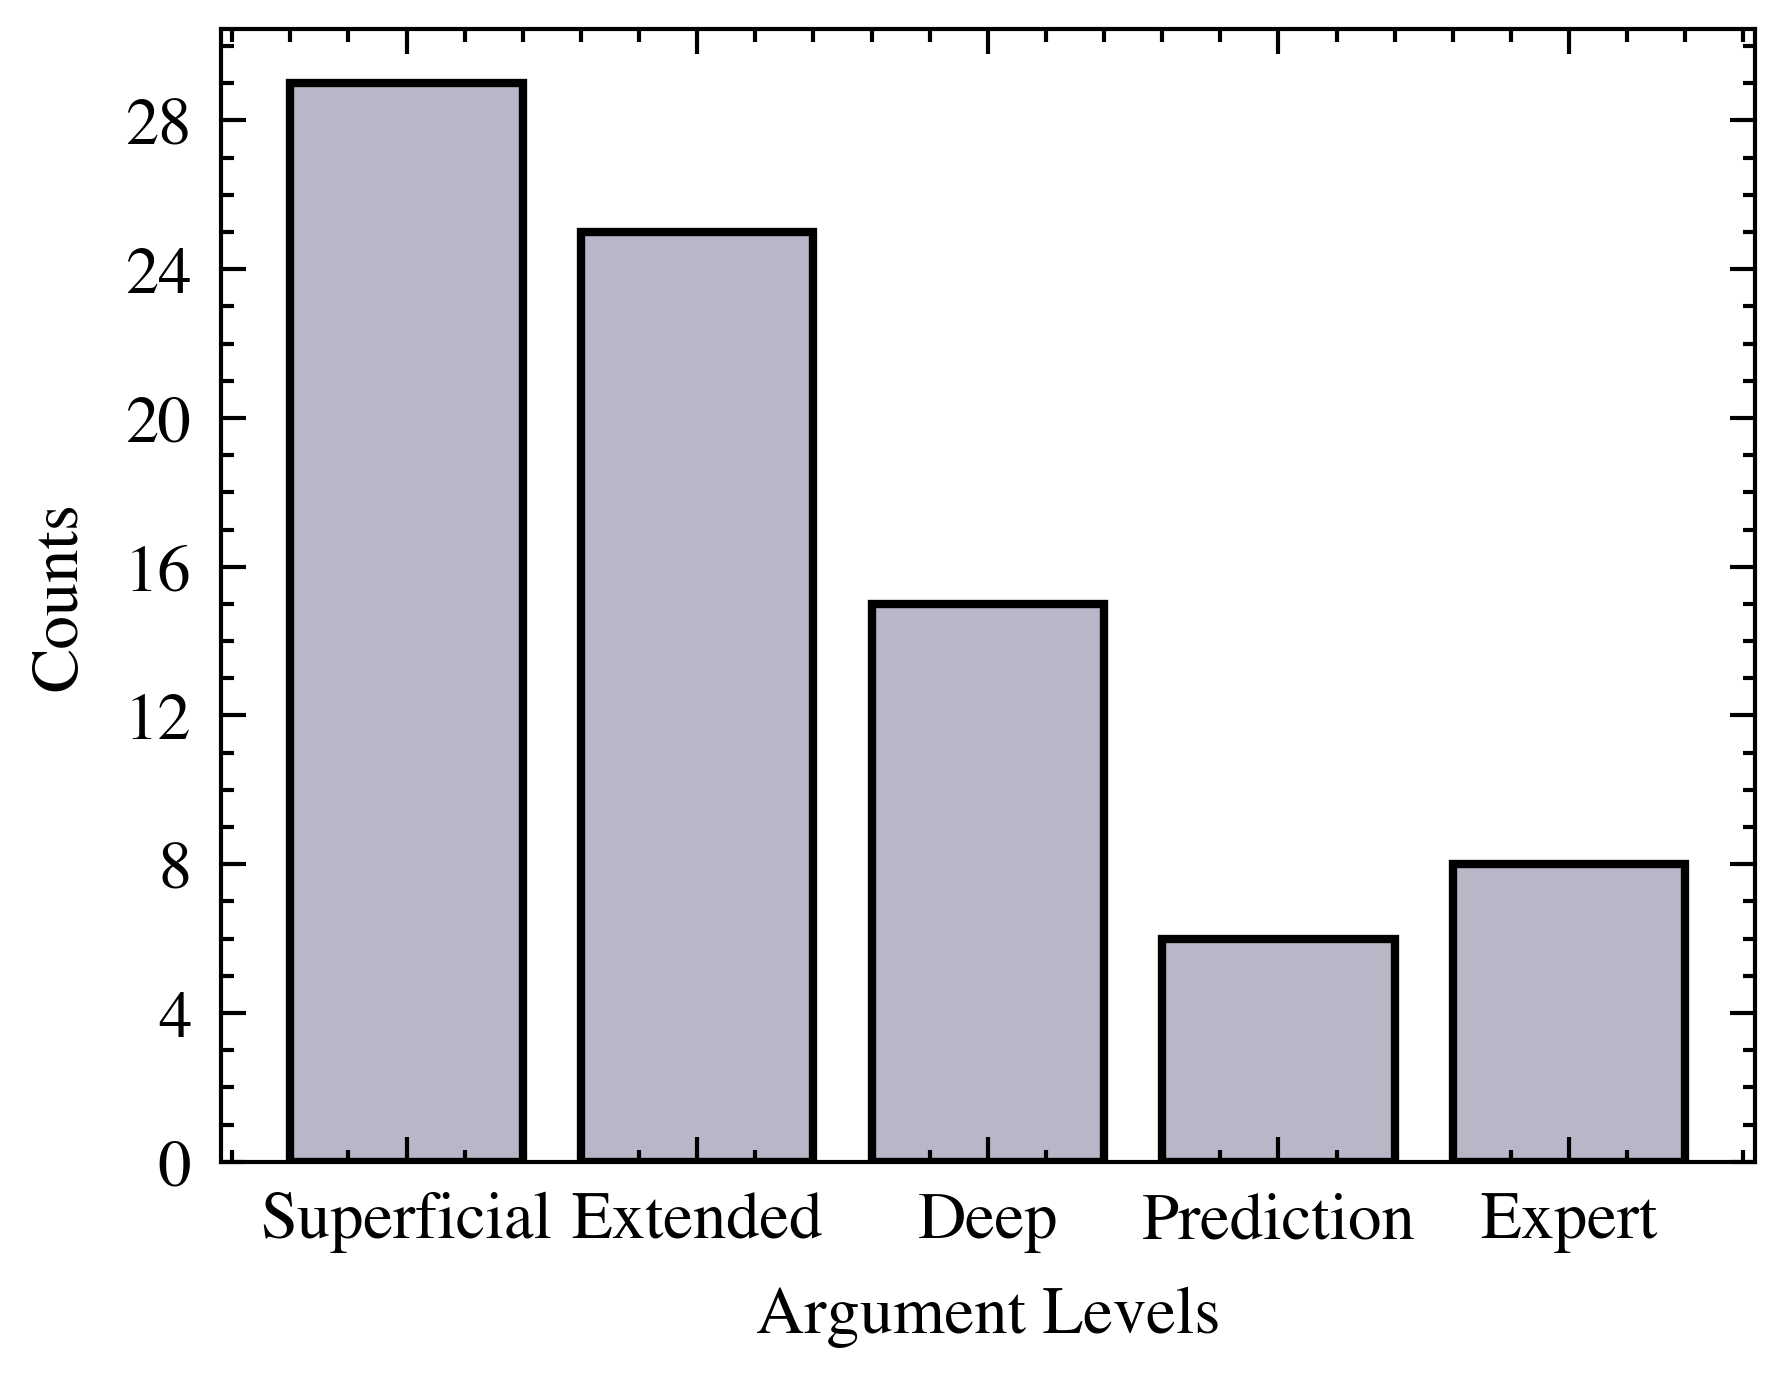

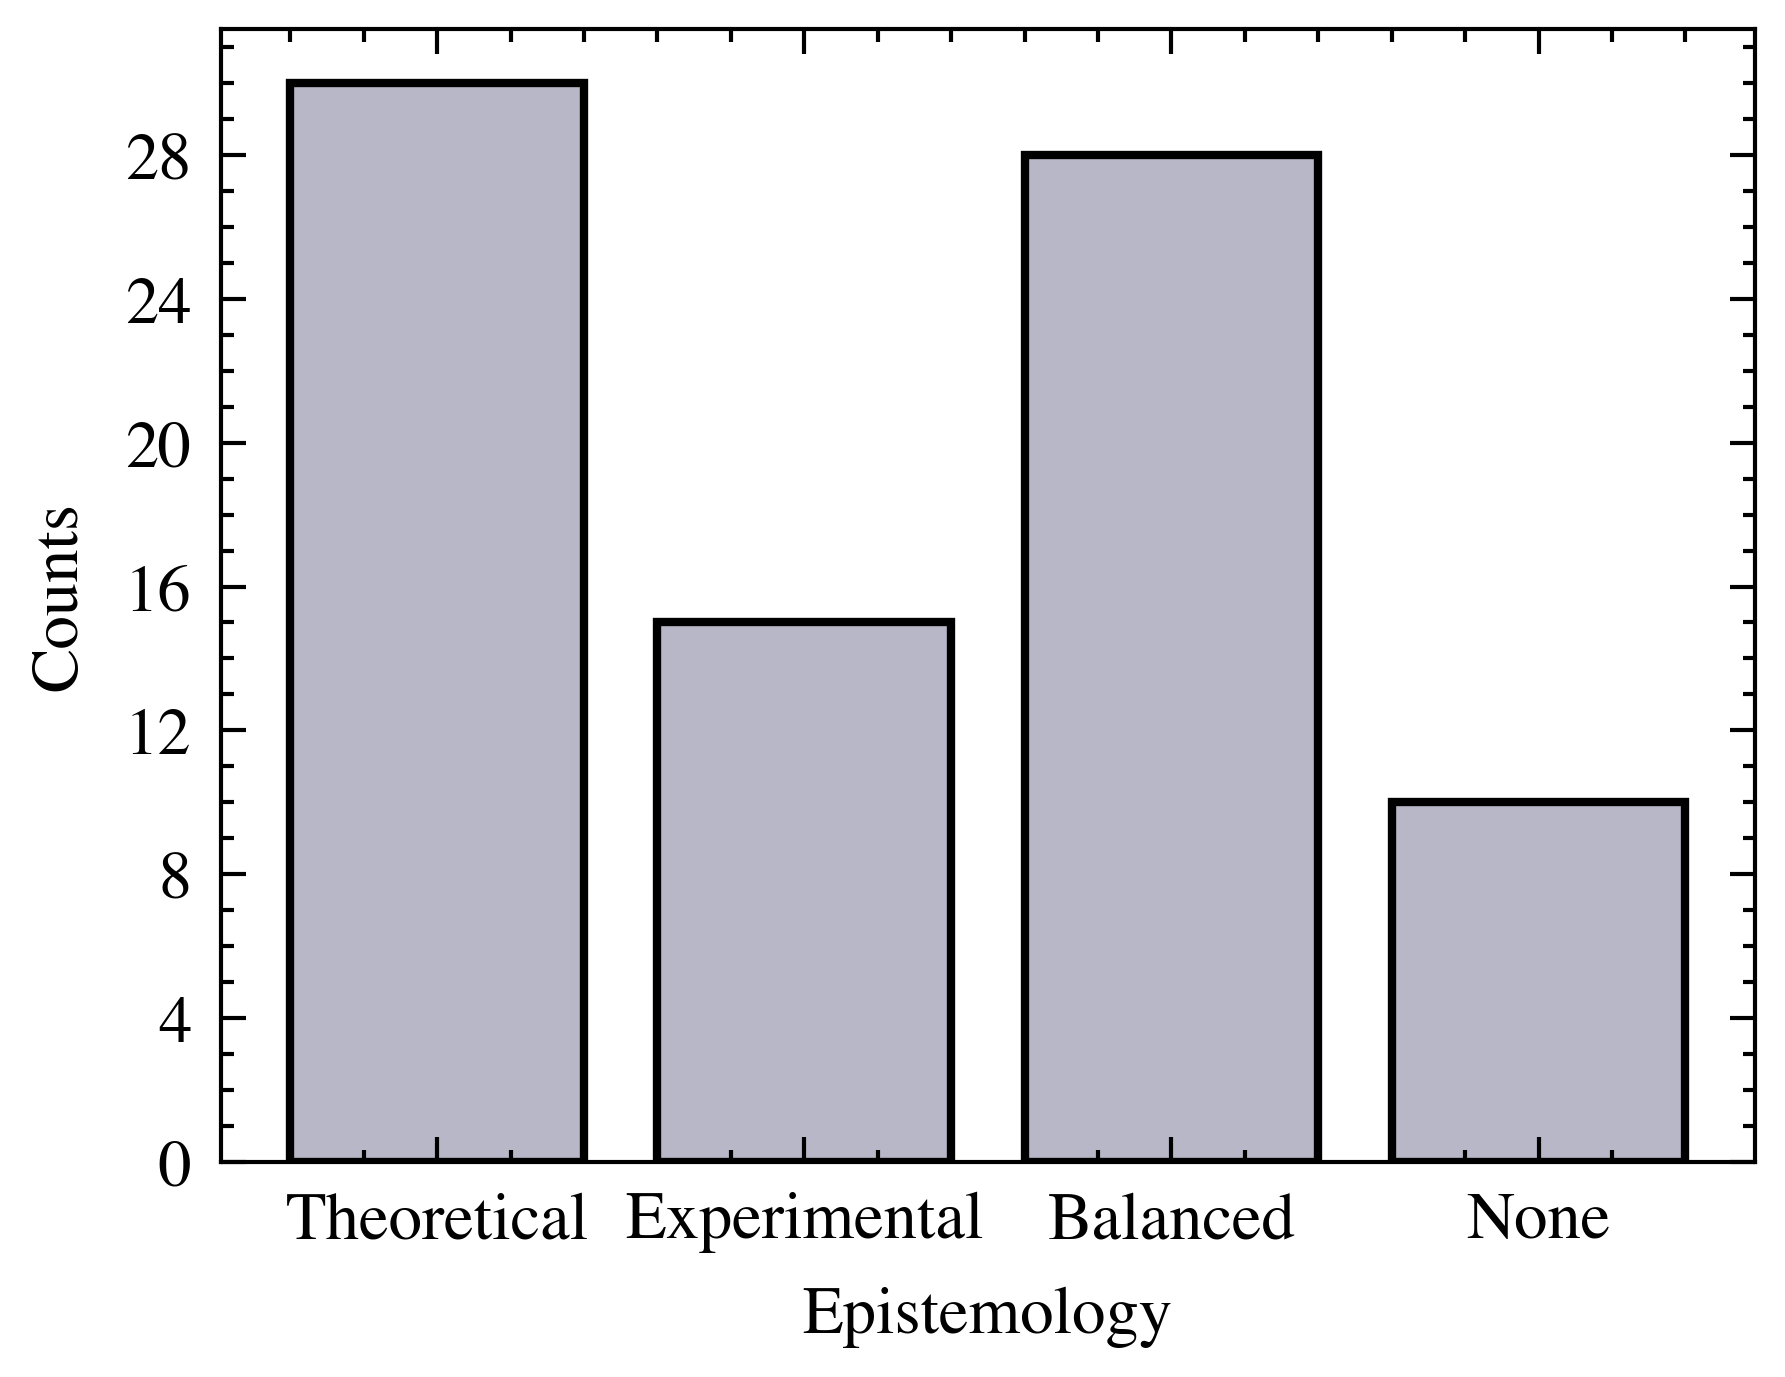

In [5]:
df = pd.read_excel(r'data/labels_y2.xlsx', sheet_name="Sheet1")

ArgumentLevel = ['Superficial', 'Extended', 'Deep', 'Prediction', 'Expert', ]
dummy_dict = df['ArgumentLevel'].value_counts().to_dict()
counts = [dummy_dict[key] for key in ArgumentLevel]
# print(counts)
bar_plot(ArgumentLevel, counts, xlabel = 'Argument Levels', ylabel = 'Counts', filepath = 'outputs/y2/counts_vs_ArgumentLevel.png')

ReasoningLevel = ['THE', 'EXP', 'BAL', 'NONE']
dummy_dict = df['ReasoningLevel'].value_counts().to_dict()
print(dummy_dict)
counts = [dummy_dict[key] for key in ReasoningLevel]
ReasoningLevel = ['Theoretical', 'Experimental','Balanced', 'None']
bar_plot(ReasoningLevel, counts, xlabel = 'Epistemology', ylabel = 'Counts', filepath = 'outputs/y2/counts_vs_Epistemology.png')

# 2. Create Year2 CSV data file for training

In [8]:
from tools import utils, formats

In [20]:
# Indicate path

# input
dir_xml = '/Users/jiayangzhang/Library/CloudStorage/OneDrive-ImperialCollegeLondon/year4/anonymised_reports/year_2_2018/xml'
dir_txt = '/Users/jiayangzhang/Library/CloudStorage/OneDrive-ImperialCollegeLondon/year4/anonymised_reports/year_2_2018/txt'
csv_in = 'data/labels_y2.xlsx'

# output
csv_out = 'outputs/labels_cleaned_y2.csv'

In [22]:
# -- unpack xml files --

counter = 0

for file in os.listdir(dir_xml):
    if file.startswith('2ndINT_') and file.endswith('.tei.xml'):

        # Count # of files
        counter += 1

        # Get StudentID
        filename = file.rsplit('.', maxsplit=2)[0]
        # Extract text from reports
        utils.xml_to_txt(dir_xml, dir_txt, filename, alltext=True, processtext = True)

print('Total number of files:', counter)



Total number of files: 83


# unpack csv labels and txt files

In [24]:
# Build dataframe for texts
df_files = utils.build_files_dataframe(dir_txt, '2ndINT_', '.txt')

# Built dataframe for labels
df_labels = utils.build_labels_dataframe(csv_in)

# Merge two dataframes
df = pd.merge(df_files, df_labels, left_on='StudentID', right_on='StudentID')      # merged dataframe: StudentID, Content, ArgumentLevel, ReasoningLevel

# Check # of reports
print('# of reports: ',len(df.index))

# Save merged dataframe as csv
df.to_csv(csv_out, encoding='utf-8')

# of reports:  83
